In [6]:
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

from tensorflow import keras
from keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.preprocessing import image_dataset_from_directory

import os
import matplotlib.image as mpimg


In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
from zipfile import ZipFile

data_path = 'dataset_cat_dog.zip'

with ZipFile(data_path, 'r') as zip:
	zip.extractall()
	print('The data set has been extracted.')


The data set has been extracted.


In [9]:
data_path = 'dataset_cat_dog.zip'

with ZipFile(data_path, 'r') as zip:
    zip.extractall()
    print('The dataset has been extracted.')

path = 'dataset_cat_dog'  # Ubah path menjadi direktori yang telah diekstrak
classes = os.listdir(path)
classes


The dataset has been extracted.


['dogs', 'cats']

In [10]:
fig = plt.gcf()
fig.set_size_inches(16, 16)

cat_dir = os.path.join('dataset_cat_dog', 'cats')
dog_dir = os.path.join('dataset_cat_dog', 'dogs')

cat_names = os.listdir(cat_dir)
dog_names = os.listdir(dog_dir)

pic_index = 210

cat_images = [os.path.join(cat_dir, fname)
			for fname in cat_names[pic_index-8:pic_index]]
dog_images = [os.path.join(dog_dir, fname)
			for fname in dog_names[pic_index-8:pic_index]]

for i, img_path in enumerate(cat_images + dog_images):
	sp = plt.subplot(4, 4, i+1)
	sp.axis('Off')

	img = mpimg.imread(img_path)
	plt.imshow(img)

plt.show()


Output hidden; open in https://colab.research.google.com to view.

In [11]:
base_dir = 'dataset_cat_dog'

# Create datasets
train_datagen = image_dataset_from_directory(base_dir,
												image_size=(200,200),
												subset='training',
												seed = 1,
												validation_split=0.1,
												batch_size= 32)
test_datagen = image_dataset_from_directory(base_dir,
												image_size=(200,200),
												subset='validation',
												seed = 1,
												validation_split=0.1,
												batch_size= 32)


Found 838 files belonging to 2 classes.
Using 755 files for training.
Found 838 files belonging to 2 classes.
Using 83 files for validation.


In [13]:
model = tf.keras.models.Sequential([
	layers.Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)),
	layers.MaxPooling2D(2, 2),
	layers.Conv2D(64, (3, 3), activation='relu'),
	layers.MaxPooling2D(2, 2),
	layers.Conv2D(64, (3, 3), activation='relu'),
	layers.MaxPooling2D(2, 2),
	layers.Conv2D(64, (3, 3), activation='relu'),
	layers.MaxPooling2D(2, 2),

	layers.Flatten(),
	layers.Dense(512, activation='relu'),
	layers.BatchNormalization(),
	layers.Dense(512, activation='relu'),
	layers.Dropout(0.1),
	layers.BatchNormalization(),
	layers.Dense(512, activation='relu'),
	layers.Dropout(0.2),
	layers.BatchNormalization(),
	layers.Dense(1, activation='sigmoid')
])


In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 99, 99, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 46, 46, 64)        36928     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 23, 23, 64)      

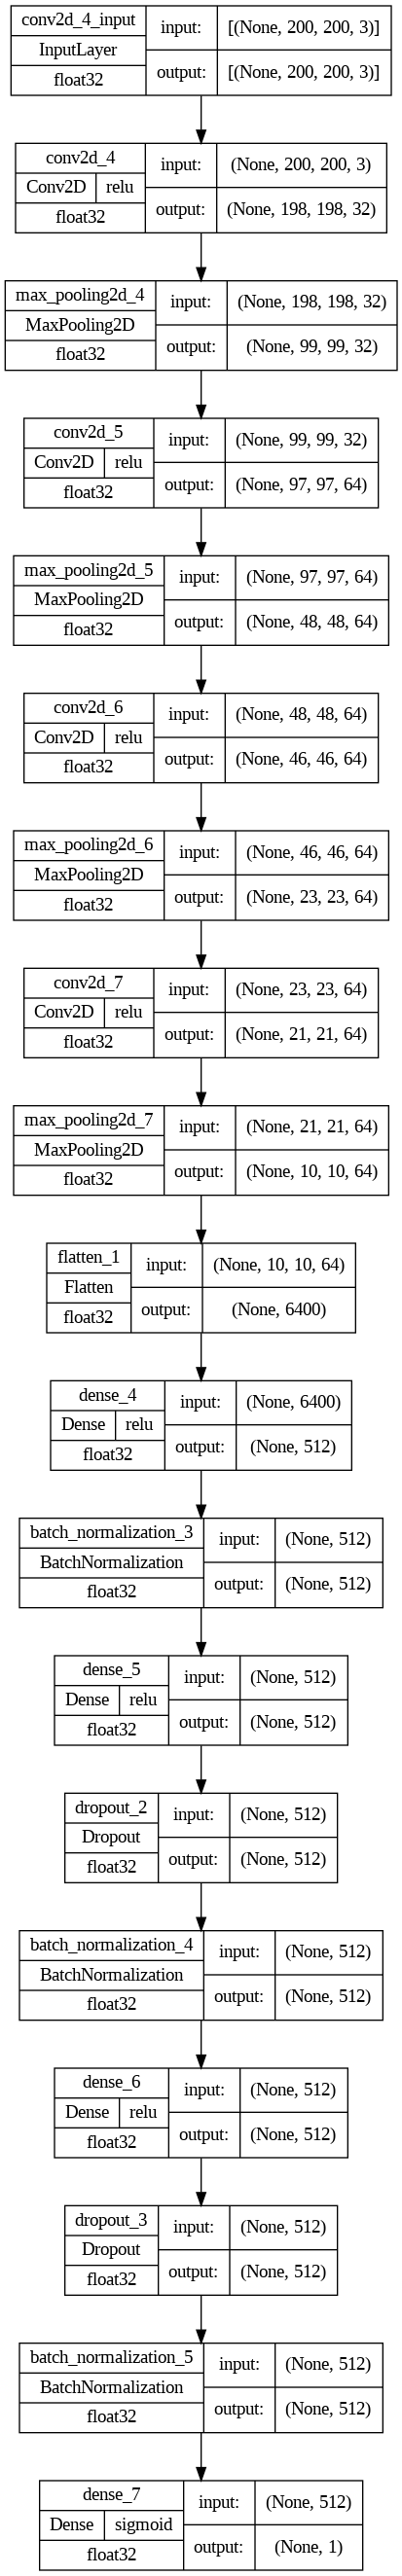

In [15]:
keras.utils.plot_model(
	model,
	show_shapes=True,
	show_dtype=True,
	show_layer_activations=True
)


In [16]:
model.compile(
	loss='binary_crossentropy',
	optimizer='adam',
	metrics=['accuracy']
)

In [17]:
history = model.fit(train_datagen,
		epochs=10,
		validation_data=test_datagen)


Epoch 1/10
24/24 [==============================] - 72s 3s/step - loss: 0.8929 - accuracy: 0.5457 - val_loss: 11.8811 - val_accuracy: 0.3133
Epoch 2/10
24/24 [==============================] - 63s 3s/step - loss: 0.7830 - accuracy: 0.6225 - val_loss: 1.0451 - val_accuracy: 0.4819
Epoch 3/10
24/24 [==============================] - 72s 3s/step - loss: 0.6650 - accuracy: 0.6901 - val_loss: 0.9282 - val_accuracy: 0.6988
Epoch 4/10
24/24 [==============================] - 67s 3s/step - loss: 0.5618 - accuracy: 0.7377 - val_loss: 0.5194 - val_accuracy: 0.7831
Epoch 5/10
24/24 [==============================] - 67s 3s/step - loss: 0.4953 - accuracy: 0.7629 - val_loss: 0.7622 - val_accuracy: 0.7229
Epoch 6/10
24/24 [==============================] - 64s 3s/step - loss: 0.5412 - accuracy: 0.7510 - val_loss: 1.1750 - val_accuracy: 0.5663
Epoch 7/10
24/24 [==============================] - 68s 3s/step - loss: 0.5604 - accuracy: 0.7166 - val_loss: 1.8652 - val_accuracy: 0.6988
Epoch 8/10
24/24 [=

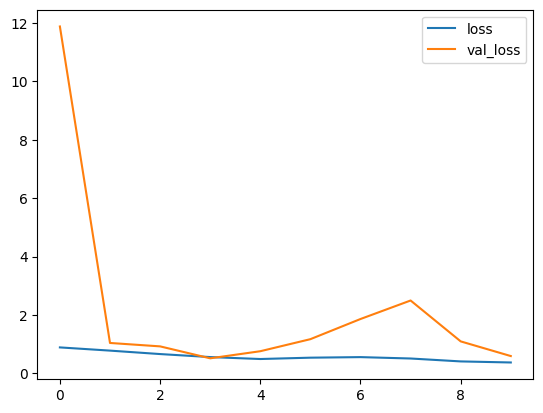

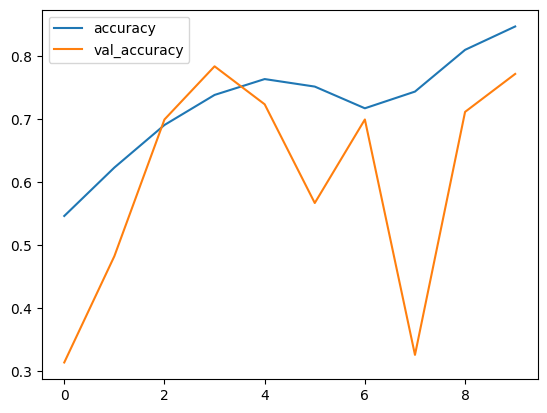

In [18]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
history_df.loc[:, ['accuracy', 'val_accuracy']].plot()
plt.show()

1/1 [==============================] - 0s 188ms/step
kucing


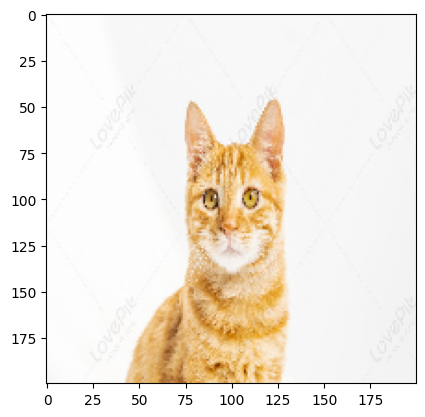

In [24]:
from tensorflow.keras.preprocessing import image

# Input image
test_image = image.load_img('kucing.jpg', target_size=(200, 200))

# For show image
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

# Result array
result = model.predict(test_image)

# Mapping result array with the main name list
if result >= 0.5:
    print("anjing")
else:
    print("kucing")

1/1 [==============================] - 0s 66ms/step
anjing


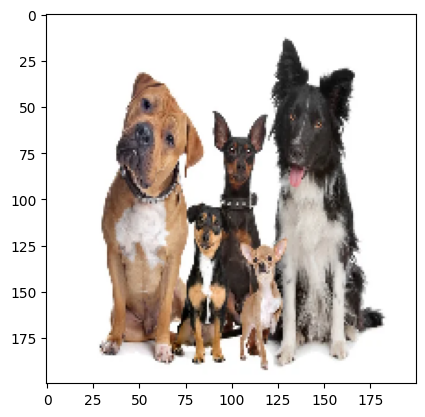

In [25]:
test_image = image.load_img('anjing.jpg', target_size=(200, 200))

# For show image
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

# Result array
result = model.predict(test_image)
# Mapping result array with the main name list
i = 0
if(result >= 0.5):
	print("anjing")
else:
	print("kucing")
